In [34]:
%pip install -q numpy
%pip install -q matplotlib
%pip install -q Pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import io
import os

In [3]:
WIDTH, HEIGHT = 98, 98

In [4]:
current_path = os.getcwd()
images_path = current_path+'/static_images/sample_images'
print(images_path)

/home/seba/Code/SistEmb/proyecto/fill_water_system/static_images/sample_images


In [106]:
images = []
for file in os.listdir(images_path):
    if file.startswith("image") or file.startswith("user"):
        images.append(file)

print("All images ")
for indx, image in enumerate(images):
    print(indx, image)

All images 
0 image7
1 image8
2 image9
3 image0
4 image1
5 image2
6 image3
7 image4
8 image5
9 image6


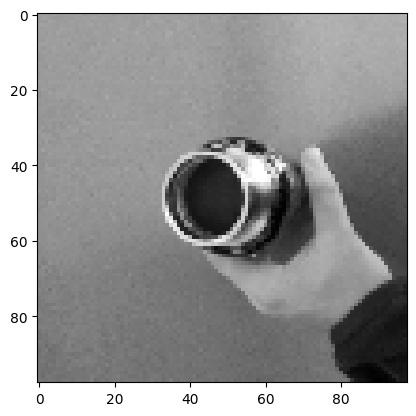

int8


In [108]:
while True:
    try:
        image_indx = int(input("Enter the index of the image: "))
        if image_indx < 0 or image_indx >= len(images):
            print("Please enter a valid index")
            continue
        break
    except:
        print("Please enter a valid index")

file_path = images_path+'/'+images[image_indx]

with open(file_path, 'rb') as file:
    file_bytes = file.read()
    image_data_one_dimension = np.frombuffer(file_bytes, dtype=np.int8)
    image_data = image_data_one_dimension.reshape((HEIGHT, WIDTH))
    plt.imshow(image_data, cmap='gray')  # Use grayscale color map
    # plt.axis('off')  # Hide axis labels and ticks
    plt.show()
    print(image_data.dtype)
        

In [5]:
def get_image(values):
    image = np.zeros((WIDTH,HEIGHT))
    d=0
    for y in range(0,HEIGHT-1):
        for x in range(0,WIDTH-1):
            image[y,x] = values[y*WIDTH+x]
    return image

In [9]:
dec_img = np.array([
-63, -56, -52, -61, -62, -65, -60, -59, -52, -56, -62, -65, -58, -52, -55, -52, -54, -55, -52, -56, -62, -57, -55, -66, -60, -44, -52, -64, -51, -55, -51, -47, -48, -61, -56, -30, -62, -61, -49, -70, -69, -74, -80, -77, -75, -79, -77, -74, -70, -65, -36, -40, -34, -32, -36, -32, -54, -56, -44, -32, -20, -38, -38, -40, -41, -44, -27, -30, -26, -29, -25, -33, -25, -29, -35, -31, -35, -37, -38, -39, -37, -44, -38, -38, -43, -46, -42, -40, -44, -39, -39, -52, -42, -46, -49, -45, -58, -71, -89, -72, -93, -81, -74, -66, -52, -81, -81, -98, -66, -64, -78, -70, -46, -68, -65, -68, -74, -77, -67, -66, -61, -67, -69, -83, -18, -85, -68, -49, -74, 34, -29, -8, -44, -66, -112, -75, -59, -77, -83, -74, -84, -80, -79, -85, -40, -6, -8, -8, -7, -7, -9, -43, -80, -23, 6, 11, -13, -17, -19, -17, -18, -22, -21, -25, -23, -25, -24, -26, -31, -33, -33, -33, -38, -41, -41, -45, -47, -44, -42, -42, -46, -47, -35, -54, -57, -56, -55, -61, -58, -58, -60, -56, -95, -68, -77, -102, -90, -82, -71, -70, -93, -99, -79, -72, -62, -78, -73, -69, -61, -51, -60, -68, -82, -80, -86, -93, -86, -79, -96, -4, -28, -72, -55, -57, -47, -60, -46, -54, -65, -69, -88, -72, -59, -104, -70, -79, -75, -86, -78, -91, -12, -10, -7, -8, -7, -10, -5, -100, -49, -16, 23, -10, -16, -17, -15, -21, -20, -23, -21, -27, -26, -24, -24, -30, -33, -32, -35, -36, -39, -42, -39, -42, -48, -48, -33, -52, -58, -51, -43, -51, -56, -57, -58, -60, -55, -62, -61, -59, -87, -87, -95, -88, -74, -81, -68, -73, -72, -69, -59, -73, -65, -54, -65, -62, -66, -53, -70, -79, -74, -71, -78, -74, -77, -40, -33, -16, -76, -69, -58, -53, -20, -90, -49, -81, -70, -79, -59, -81, -86, -81, -87, -80, -69, -80, -54, 9, -11, -12, -14, -10, -11, 7, -69, -9, -10, 2, -12, -19, -20, -21, -19, -19, -21, -23, -22, -22, -27, -28, -28, -28, -27, -33, -36, -39, -43, -43, -39, -41, -47, -43, -36, -45, -46, -53, -48, -54, -55, -57, -57, -57, -59, -60, -62, -62, -99, -86, -80, -91, -60, -60, -77, -71, -67, -69, -69, -69, -69, -72, -56, -49, -57, -51, -65, -82, -81, -74, -84, -69, -44, -76, 13, -57, -3, -31, -77, -91, -8, -73, -52, -60, -76, -79, -78, -82, -76, -83, -81, -78, -74, -95, 22, -10, -11, -12, -11, -11, 9, -92, -52, -16, 18, -3, -18, -21, -19, -20, -21, -24, -22, -22, -23, -23, -25, -27, -28, -29, -29, -35, -37, -43, -38, -42, -39, -43, -41, -48, -45, -49, -48, -50, -53, -50, -54, -55, -55, -58, -59, -50, -56, -64, -70, -82, -80, -47, -58, -75, -57, -66, -76, -81, -64, -71, -63, -67, -58, -52, -93, -63, -70, -50, -63, -76, -73, -42, -30, -53, -76, -24, -10, -77, -43, -71, -85, -1, -50, -73, -77, -79, -79, -71, -78, -51, -77, -81, -104, 11, -11, -11, -14, -14, -19, -3, -99, -41, -29, 1, -10, -20, -24, -26, -23, -23, -25, -26, -25, -25, -26, -24, -24, -24, -31, -30, -37, -30, -40, -35, -34, -43, -42, -46, -45, -42, -47, -50, -49, -54, -53, -53, -52, -53, -57, -62, -56, -56, -57, -58, -83, -81, -88, -54, -59, -70, -78, -69, -76, -65, -57, -84, -62, -65, -65, -57, 17, -66, -56, -61, -76, -66, -41, -59, -70, -44, -57, -19, -13, -34, -49, -46, -30, -31, -69, -77, -76, -83, -79, -78, -78, -77, -79, -80, -35, -9, -13, -15, -15, -16, -21, -92, -51, -32, -2, -6, -37, -24, -22, -23, -22, -21, -21, -24, -21, -25, -25, -28, -27, -26, -34, -31, -35, -34, -22, -32, -37, -40, -44, -45, -47, -46, -48, -52, -50, -52, -58, -60, -58, -58, -48, -54, -61, -55, -58, -58, -79, -81, -68, -70, -62, -69, -66, -64, -56, -67, -51, -51, -63, -82, -16, -13, 19, -81, -59, -61, -95, -57, -48, -86, -63, -36, -18, -22, -51, -43, -37, -48, -46, -76, -80, -65, -85, -69, -74, -66, -83, -82, -76, -30, 0, -14, -12, -13, -6, -14, -71, -67, -31, -16, -3, -10, -29, -25, -24, -26, -25, -23, -24, -24, -24, -22, -21, -27, -27, -27, -29, -28, -33, -30, -34, -37, -37, -39, -42, -39, -43, -47, -43, -46, -50, -50, -51, -53, -55, -57, -57, -55, -44, -56, -59, -61, -68, -68, -73, -63, -64, -65, -74, -60, -57, -57, -58, -53, -81, -49, -12, 22, -81, -66, -55, -47, -70, -40, -76, -68, -84, -58, -7, -39, -6, -49, -61, -37, -57, -71, -68, -73, -76, -66, -79, -76, -75, -78, -101, 10, -9, -13, -16, -20, -30, -26, -77, -35, -42, -5, -44, -25, -31, -27, -15, -19, -23, -25, -26, -26, -27, -26, -23, -24, -28, -30, -30, -31, -29, -32, -33, -34, -41, -40, -43, -50, -39, -45, -43, -48, -50, -49, -53, -55, -55, -63, -54, -56, -52, -58, -57, -57, -68, -66, -63, -70, -80, -70, -65, -63, -60, -60, -66, -70, -73, -83, -83, -78, -74, -70, -45, -51, -72, -80, -75, -73, -96, -66, -32, -45, -48, -39, -57, -11, -70, -39, -71, -76, -55, -84, -74, -76, -71, -71, 12, -5, -11, -17, -20, -27, -23, -92, -46, -37, -14, -21, -26, -33, -27, -25, -21, -22, -24, -25, -26, -24, -25, -26, -23, -23, -27, -29, -34, -32, -32, -35, -36, -38, -34, -41, -46, -41, -49, -43, -48, -50, -50, -49, -50, -49, -57, -61, -51, -54, -52, -46, -54, -59, -70, -66, -69, -63, -70, -58, -54, -70, -74, -72, -74, -51, -59, -77, -64, -70, -68, -52, -57, -61, -78, -53, -43, -77, -63, -30, -16, -74, -11, -24, -15, -80, -61, -70, -75, -55, -79, -79, -71, -73, -87, 20, -6, -9, -13, -15, -21, -41, -70, -53, -39, -5, -24, -28, -32, -26, -27, -26, -24, -25, -21, -27, -26, -26, -25, -31, -35, -28, -25, -28, -28, -29, -34, -34, -32, -37, -38, -37, -44, -35, -33, -47, -45, -49, -52, -53, -50, -58, -54, -55, -58, -55, -57, -56, -57, -57, -75, -72, -50, -66, -53, -73, -77, -69, -57, -56, -93, -70, -91, -81, -60, -65, -59, -49, -83, -23, -13, -5, -57, -31, -51, -38, -15, -7, -6, 5, -95, -69, -68, -60, -64, -75, -75, -71, -71, -88, 19, -4, -6, -11, -17, -22, -28, -95, -18, -35, -20, -20, -33, -31, -34, -25, -29, -28, -23, -28, -24, -30, -28, -25, -29, -25, -28, -29, -27, -27, -30, -32, -32, -35, -36, -39, -36, -37, -37, -40, -45, -47, -49, -47, -51, -52, -51, -55, -55, -55, -54, -51, -54, -55, -56, -58, -73, -86, -94, -66, -73, -69, -60, -93, -63, -73, -68, -62, -48, -40, -60, -67, -60, -86, -3, -82, -54, -47, -48, -37, -29, -67, -33, -50, -56, -108, -46, -68, -78, -77, -65, -81, -72, -71, -84, -42, -2, -4, -8, -14, -10, -32, -65, -60, -42, -24, -20, -33, -34, -32, -29, -24, -28, -27, -43, -28, -28, -28, -49, -27, -26, -34, -28, -26, -28, -29, -29, -40, -27, -38, -34, -36, -39, -37, -38, -39, -42, -42, -43, -46, -49, -51, -54, -52, -56, -53, -57, -57, -65, -59, -60, -58, -76, -76, -77, -78, -70, -71, -59, -65, -91, -76, -81, -41, -47, -40, -63, -69, -72, -56, -12, -85, -75, -49, -16, -69, -71, -23, -47, -65, -58, -62, -58, -66, -80, -67, -73, -61, -73, -70, -13, -2, -2, -6, -9, -18, -25, -51, -97, -42, -24, -23, -27, -37, -30, -41, -27, -28, -29, -26, -24, -26, -29, -29, -27, -30, -26, -28, -33, -30, -38, -24, -30, -40, -32, -36, -38, -40, -37, -44, -38, -44, -54, -42, -46, -47, -50, -59, -40, -53, -55, -56, -52, -62, -57, -63, -61, -62, -71, -65, -76, -67, -90, -71, -72, -66, -68, -90, -32, -46, -44, -58, -72, -73, -32, -9, -81, -68, -68, -26, -36, -82, 32, -14, -66, -69, -71, -59, -50, -85, -49, -84, -69, -67, -70, -40, 8, 3, -3, -9, -13, -18, -49, -74, -37, -27, -21, -28, -30, -33, -27, -28, -28, -29, -25, -26, -28, -27, -30, -27, -34, -35, -33, -35, -34, -36, -31, -33, -31, -35, -37, -33, -46, -40, -39, -38, -43, -42, -59, -45, -46, -49, -45, -55, -47, -54, -56, -67, -64, -56, -62, -70, -66, -68, -49, -78, -66, -72, -95, -83, -73, -60, -53, -65, -50, -40, -42, -77, -77, -44, -26, -65, -54, -77, -41, -32, -98, -14, -53, -37, -53, -80, -53, -65, -101, -48, -75, -72, -71, -78, -93, 14, 3, 0, -8, -10, -14, -39, -88, -34, -31, -17, -25, -26, -31, -30, -31, -29, -28, -27, -28, -27, -33, -33, -35, -32, -38, -28, -32, -35, -33, -36, -34, -40, -38, -33, -37, -38, -40, -36, -40, -47, -46, -37, -43, -45, -44, -51, -54, -56, -58, -60, -63, -60, -60, -66, -65, -66, -62, -72, -69, -80, -79, -84, -81, -74, -49, -56, -28, -92, -38, -71, -49, 6, 38, -73, -71, -73, -39, -16, -68, -76, -67, -29, 0, -10, -91, -45, -75, -94, -39, -91, -74, -66, -68, -90, -6, 5, 2, -5, -10, -8, 0, -93, -46, -11, -13, -15, -25, -30, -32, -31, -28, -28, -27, -32, -30, -30, -32, -30, -32, -34, -32, -39, -35, -38, -29, -35, -35, -34, -35, -39, -35, -35, -37, -37, -36, -36, -45, -34, -43, -40, -48, -54, -57, -63, -61, -60, -61, -61, -64, -61, -63, -67, -70, -67, -84, -78, -72, -83, -70, -90, -56, -71, -86, -53, -74, 33, 12, 17, -54, -53, -70, -40, -29, -76, -49, -77, -90, 11, 10, -107, -61, -51, -73, -58, -67, -73, -82, -66, -79, 36, 9, 5, 3, -1, -7, -11, -64, -47, -23, -10, -14, -32, -26, -28, -26, -31, -30, -31, -31, -36, -31, -26, -32, -30, -32, -35, -36, -34, -32, -24, -28, -37, -36, -37, -37, -38, -38, -38, -35, -35, -35, -44, -42, -45, -45, -50, -50, -52, -53, -57, -60, -59, -59, -63, -62, -62, -65, -63, -64, -66, -76, -72, -76, -72, -83, -77, -66, -79, -53, -77, -73, 5, 3, -37, -39, -72, -18, -23, -82, -42, -32, -81, -22, -42, -82, -66, -58, -61, -55, -65, -68, -75, -62, -67, 5, 11, 7, 5, 0, -5, -5, -76, -51, -36, -3, -11, -26, -27, -27, -26, -30, -32, -29, -30, -37, -28, -29, -28, -32, -39, -36, -34, -35, -34, -34, -36, -35, -36, -36, -38, -33, -38, -40, -39, -39, -39, -33, -42, -41, -43, -50, -51, -54, -57, -49, -38, -58, -69, -53, -58, -62, -61, -62, -63, -63, -65, -94, -71, -73, -67, -4, -3, -69, -76, -72, -84, -44, -7, -13, -46, -60, -88, -38, -56, -60, -63, -56, -14, -63, -75, -56, -53, -55, -61, -48, -69, -71, -62, -69, 14, 14, 8, 6, 4, 2, 0, -59, -77, -9, -2, -6, -23, -24, -24, -24, -31, -28, -30, -26, -27, -28, -25, -27, -30, -30, -35, -34, -43, -34, -38, -37, -39, -39, -37, -39, -37, -39, -38, -40, -41, -46, -44, -49, -47, -48, -48, -46, -52, -53, -58, -57, -60, -63, -57, -58, -67, -66, -63, -63, -67, -63, -67, -78, -74, -76, -83, -6, -50, -60, -81, -77, -72, -59, -48, -67, -76, -73, -92, -52, -53, -31, -76, -22, -13, 15, -72, -52, -60, -79, -18, -71, -66, -62, -80, -32, 27, 13, 7, 7, 5, 0, -17, -72, -23, -3, -2, -22, -23, -24, -28, -28, -24, -25, -25, -30, -24, -28, -28, -32, -30, -35, -37, -38, -32, -35, -36, -37, -37, -36, -39, -39, -37, -37, -42, -42, -41, -45, -47, -48, -50, -45, -53, -49, -51, -55, -53, -57, -59, -58, -57, -58, -60, -61, -63, -64, -65, -69, -67, -51, -57, -79, 19, 9, -95, -90, -71, -84, -59, -76, -73, -73, -73, -56, -27, -40, -38, -50, -64, -9, -41, -51, -40, -69, -72, -36, -72, -63, -62, -59, -74, 33, 19, 9, 8, 8, 7, 0, -76, -17, -12, 6, -6, -18, -24, -23, -22, -23, -25, -26, -25, -27, -28, -26, -26, -28, -30, -33, -36, -35, -37, -37, -39, -41, -40, -43, -39, -42, -41, -42, -41, -36, -42, -49, -45, -50, -50, -49, -50, -55, -49, -55, -57, -57, -55, -59, -53, -61, -60, -61, -58, -60, -64, -60, -66, -79, -105, 14, 7, -68, -71, -62, -64, -85, -65, -77, -64, -68, -76, -23, -83, -32, -39, -51, -47, -24, -63, -51, -55, -63, -57, -70, -64, -63, -60, -69, 48, 21, 18, 14, 11, 12, 29, -54, -7, -9, 6, 1, -15, -12, -18, -17, -22, -22, -22, -23, -27, -26, -30, -30, -30, -30, -30, -34, -31, -34, -37, -35, -35, -37, -35, -35, -38, -41, -42, -41, -45, -45, -44, -45, -48, -49, -55, -47, -50, -54, -47, -55, -53, -56, -54, -60, -64, -61, -62, -60, -66, -60, -67, -59, -66, -102, 26, 6, -76, -81, -72, -69, -68, -60, -72, -61, -70, -65, -62, -64, -60, -42, -39, -23, -80, -59, -54, -59, -64, -36, -76, -64, -60, -60, -94, 35, 28, 22, 20, 18, 16, 34, -62, 1, 4, 18, 8, -11, -15, -20, -18, -23, -22, -21, -24, -28, -25, -26, -27, -28, -30, -33, -31, -40, -34, -35, -37, -30, -36, -34, -37, -39, -39, -40, -35, -44, -46, -44, -46, -49, -43, -53, -53, -46, -51, -47, -43, -51, -59, -55, -52, -57, -56, -56, -60, -59, -60, -64, -62, -65, -63, -63, -6, -77, -70, -78, -96, -44, -79, -62, -64, -66, -74, -73, -89, -84, -50, -60, -28, -73, -60, -53, -51, -58, -53, -28, -65, -61, -58, -87, 62, 30, 28, 23, 22, 19, 38, -67, -21, 0, 18, 12, -7, -14, -13, -18, -20, -23, -20, -20, -23, -21, -22, -26, -27, -27, -30, -30, -33, -30, -34, -33, -33, -39, -37, -38, -36, -37, -38, -44, -43, -42, -44, -50, -48, -48, -55, -45, -55, -51, -51, -50, -53, -49, -49, -58, -54, -55, -56, -56, -57, -58, -59, -62, -61, -60, -66, -8, -20, -78, -68, -79, -24, -44, -73, -103, -61, -70, -46, -55, -51, -55, -73, -11, -58, -64, -53, -55, -53, -78, -40, -65, -61, -60, -68, -3, 34, 32, 28, 24, 24, 27, -20, -46, 2, 19, 26, -4, -9, -13, -15, -13, -17, -16, -19, -23, -25, -25, -21, -27, -26, -27, -30, -31, -29, -31, -31, -30, -37, -32, -35, -37, -39, -38, -43, -39, -42, -41, -43, -47, -51, -48, -48, -47, -54, -52, -51, -53, -52, -51, -53, -46, -55, -55, -58, -56, -54, -61, -63, -60, -60, -61, -60, -46, -57, -70, -65, -38, -46, -33, 20, -100, -66, -55, -62, -41, 3, 63, 10, 0, -30, -59, -57, -52, -64, -34, -69, -64, -54, -69, -31, 46, 34, 31, 30, 28, 27, 0, -48, -10, 18, 40, 8, -6, -7, -9, -13, -12, -15, -15, -20, -22, -21, -22, -24, -27, -26, -24, -23, -28, -26, -28, -30, -34, -36, -36, -33, -37, -38, -40, -40, -42, -42, -41, -49, -48, -48, -49, -50, -52, -55, -46, -48, -53, -55, -54, -53, -50, -49, -51, -58, -59, -56, -52, -59, -59, -59, -57, -56, -82, -111, -49, -12, -34, -53, 13, -20, -125, -74, -58, -90, -20, -2, -8, -8, -9, -66, -51, -55, -115, -23, -60, -55, -63, -54, -58, 53, 35, 34, 34, 31, 29, 42, -37, 25, 11, 33, 1, 1, -5, -6, -8, -10, -10, -14, -14, -16, -17, -19, -17, -22, -23, -25, -29, -28, -32, -25, -28, -30, -33, -33, -33, -35, -39, -38, -34, -41, -46, -41, -44, -44, -47, -45, -50, -55, -52, -50, -53, -55, -53, -59, -57, -54, -51, -51, -49, -52, -54, -50, -57, -59, -60, -59, -60, -61, -34, -77, -80, -42, -81, 40, 33, -68, -70, -61, -65, -69, -32, -17, -32, -22, -60, -52, -45, -67, -32, -68, -59, -55, -51, -51, 72, 37, 36, 35, 34, 32, 26, -67, 12, 14, 31, 16, 3, 0, -1, -3, -5, -9, -10, -12, -15, -14, -18, -21, -22, -22, -22, -24, -27, -28, -26, -34, -32, -28, -36, -31, -34, -33, -37, -38, -40, -39, -40, -44, -42, -45, -40, -53, -47, -50, -49, -48, -51, -55, -50, -50, -52, -52, -54, -53, -52, -53, -56, -54, -55, -57, -59, -58, -57, -62, -74, -68, -106, -85, 22, 9, -80, -72, -69, -79, -74, -44, -46, -79, -27, -75, -44, -49, -68, -48, -57, -58, -59, -55, -46, 44, 36, 38, 36, 35, 33, 28, -41, 23, 13, 40, 34, 6, 3, 2, 0, -2, -4, -5, -9, -13, -10, -14, -14, -18, -17, -18, -22, -21, -26, -22, -25, -27, -29, -30, -32, -35, -35, -39, -38, -39, -40, -38, -43, -44, -42, -48, -45, -46, -44, -49, -51, -50, -52, -52, -52, -55, -55, -52, -56, -55, -58, -53, -43, -56, -53, -55, -57, -59, -52, -59, -80, -89, -59, -75, -22, -98, -70, -69, 24, 8, -80, -57, -15, -21, -57, -48, -32, -66, -48, -50, -64, -58, -64, -52, 69, 40, 39, 37, 36, 34, 31, -72, -14, 5, 43, 33, 13, 6, 5, 1, 1, -4, -2, -3, -9, -9, -8, -13, -14, -16, -17, -19, -20, -23, -22, -24, -24, -22, -21, -28, -30, -33, -30, -32, -35, -35, -37, -37, -40, -40, -42, -45, -41, -44, -46, -47, -50, -53, -45, -50, -48, -48, -52, -54, -52, -58, -48, -48, -56, -54, -52, -54, -54, -55, -58, -65, -76, -77, -80, -56, -55, -68, -71, -26, -31, -7, -61, 8, -6, -43, -49, -56, -41, -63, -45, -69, -58, -56, -62, 8, 38, 41, 38, 37, 36, 46, -36, 7, 3, 37, 36, 11, 10, 8, 6, 4, 0, -3, -3, -4, -9, -10, -10, -12, -13, -14, -17, -20, -18, -18, -19, -18, -22, -23, -27, -27, -26, -28, -31, -32, -34, -38, -35, -35, -37, -36, -45, -44, -45, -47, -47, -48, -47, -38, -48, -50, -58, -53, -54, -58, -56, -55, -59, -53, -48, -54, -53, -47, -52, -54, -60, -57, -78, -62, -30, -53, -66, -70, -64, -33, -16, -62, -27, 5, -64, -62, -48, -54, -68, -38, -53, -52, -49, -20, 12, 47, 41, 40, 39, 38, 38, -14, -51, 11, 36, 44, 15, 13, 10, 7, 6, 5, -1, -1, -3, -3, -6, -5, -10, -11, -12, -14, -14, -16, -15, -18, -18, -19, -23, -22, -24, -35, -30, -30, -27, -28, -34, -40, -35, -35, -39, -37, -44, -48, -43, -45, -48, -50, -48, -50, -51, -49, -59, -51, -50, -50, -52, -53, -56, -49, -48, -52, -53, -52, -57, -59, -54, -59, -40, -75, -39, -42, -71, -72, -46, -34, -63, -15, -41, -27, -76, -45, -40, -78, -10, -56, -50, -47, -59, -23, 48, 44, 43, 41, 38, 41, 16, -23, 15, 32, 44, 10, 15, 12, 9, 7, 7, 6, 3, 2, 1, -1, -4, -6, -10, -9, -10, -9, -12, -15, -14, -16, -17, -18, -19, -21, -23, -25, -25, -26, -24, -31, -30, -34, -34, -33, -39, -39, -39, -48, -44, -46, -48, -48, -49, -52, -50, -50, -51, -52, -53, -53, -48, -57, -48, -50, -56, -55, -55, -47, -51, -56, -56, -58, -84, -80, -21, -54, -74, -57, -47, -42, 5, -49, -27, -62, -50, -40, -55, -25, -56, -70, -47, -48, -24, 68, 47, 46, 44, 41, 40, 35, -69, 17, 27, 46, 20, 16, 13, 11, 8, 6, 6, 6, 2, 2, 4, -1, -2, -4, -6, -8, -7, -8, -11, -9, -10, -15, -15, -17, -17, -21, -22, -22, -19, -27, -33, -29, -34, -31, -34, -34, -42, -37, -43, -38, -40, -41, -48, -46, -52, -48, -50, -49, -50, -53, -58, -52, -51, -53, -54, -51, -51, -55, -50, -50, -52, -57, -54, -60, -52, -36, -21, -76, -70, -60, -48, -23, -42, -43, -79, -53, -62, -75, -44, -57, -54, -43, -45, -56, 66, 48, 48, 45, 45, 43, 56, -41, 25, 16, 52, 19, 16, 14, 12, 10, 11, 8, 7, 6, 4, 2, 2, 2, 1, -3, -4, -3, -6, -5, -7, -8, -9, -11, -13, -15, -17, -14, -17, -18, -16, -24, -24, -29, -26, -31, -32, -33, -32, -33, -36, -41, -38, -41, -44, -42, -43, -45, -44, -47, -48, -53, -50, -52, -51, -55, -51, -59, -53, -51, -53, -52, -51, -46, -48, -53, -50, 9, 8, -60, -80, -47, 4, 16, -37, -37, -54, -37, -57, -30, -30, -46, -39, -44, -78, 75, 48, 50, 47, 46, 44, 67, -62, 13, 22, 47, 41, 18, 15, 16, 13, 12, 9, 10, 7, 8, 7, 3, 4, 3, -1, -1, 0, -2, -2, -3, -4, -7, -9, -9, -9, -11, -18, -12, -12, -20, -18, -23, -21, -26, -29, -29, -31, -35, -37, -33, -30, -35, -38, -37, -39, -44, -42, -44, -42, -46, -46, -42, -48, -51, -49, -50, -52, -53, -50, -52, -48, -48, -50, -47, -49, -53, 16, -92, -48, -68, -83, -19, 9, 12, -28, -60, -52, -67, -60, -36, -50, -45, -47, -16, 58, 50, 51, 50, 48, 48, 70, -42, -2, 15, 59, 54, 14, 18, 13, 14, 14, 13, 9, 9, 7, 6, 5, 3, 1, 4, 0, -1, -1, -2, -1, -3, -2, -4, -6, -6, -8, -8, -11, -10, -11, -13, -15, -17, -17, -19, -24, -25, -28, -26, -26, -31, -36, -38, -37, -39, -42, -44, -43, -43, -45, -44, -49, -48, -44, -48, -49, -52, -48, -50, -49, -48, -47, -48, -47, -46, -46, -49, -79, -86, -86, -85, -17, -26, -4, -12, -72, -49, -61, -68, -17, -46, -48, -45, -74, 18, 50, 52, 50, 51, 50, 49, -16, -24, 24, 48, 53, 20, 20, 16, 17, 15, 15, 14, 12, 9, 9, 8, 6, 8, 5, 4, 1, 1, -2, -6, -2, -3, -3, -3, -4, -5, -5, -8, -8, -9, -8, -11, -13, -16, -17, -19, -19, -24, -20, -31, -32, -33, -38, -36, -37, -40, -41, -40, -45, -43, -45, -51, -46, -50, -50, -49, -50, -51, -54, -51, -51, -50, -49, -49, -48, -53, -45, -49, -72, -70, -59, -55, -34, -50, -14, -48, -49, -40, -54, -25, -47, -52, -47, -56, 0, 70, 50, 53, 51, 53, 56, 21, -12, 22, 37, 59, 31, 20, 18, 18, 16, 15, 15, 10, 10, 12, 11, 8, 6, 7, 6, 3, 3, 3, 3, 0, -2, -5, -2, -3, -4, -5, -6, -6, -7, -10, -7, -8, -11, -12, -12, -15, -17, -13, -21, -26, -28, -29, -30, -37, -35, -37, -40, -39, -38, -40, -43, -44, -48, -46, -49, -57, -47, -50, -53, -52, -53, -52, -52, -50, -46, -46, -48, -47, -69, -66, -16, -48, -55, -29, -91, -52, -65, -96, -14, -44, -48, -48, -34, -41, 74, 51, 50, 52, 52, 52, 46, -9, 37, 39, 64, 36, 23, 20, 18, 19, 15, 14, 13, 13, 12, 9, 9, 8, 7, 7, 7, 5, 3, 4, 2, 1, 0, -1, -1, -3, -4, -4, -3, -3, -4, -8, -9, -8, -8, -12, -11, -10, -15, -15, -16, -21, -27, -26, -31, -29, -29, -31, -36, -38, -40, -38, -42, -40, -46, -45, -46, -48, -49, -53, -50, -53, -55, -51, -54, -52, -53, -49, -48, -47, -58, -25, -41, -14, -3, -65, -66, -54, -83, -43, -53, -46, -50, -39, -80, 93, 52, 51, 50, 52, 51, 59, -71, 36, 26, 55, 43, 26, 23, 21, 18, 18, 13, 16, 15, 13, 12, 12, 11, 9, 8, 8, 8, 5, 4, 4, 3, 2, 1, 0, -1, 0, 0, 0, -2, -3, -6, -6, -7, -6, -7, -9, -9, -9, -11, -15, -14, -17, -20, -20, -23, -21, -30, -30, -35, -37, -34, -38, -40, -40, -41, -47, -46, -50, -48, -49, -52, -50, -52, -48, -57, -53, -53, -52, -46, -48, -31, -45, -17, 16, -87, -64, -54, -57, -86, -52, -48, -46, -48, -48, 51, 51, 54, 53, 53, 51, 52, -25, 43, 31, 62, 50, 26, 24, 21, 19, 19, 18, 16, 16, 15, 13, 13, 11, 11, 11, 7, 6, 6, 5, 4, 3, 2, 2, 3, -1, 1, 1, -1, -1, -2, -3, -5, -7, -3, -5, -7, -7, -9, -10, -10, -11, -12, -16, -18, -17, -21, -23, -26, -28, -32, -36, -38, -38, -38, -41, -45, -46, -38, -33, -48, -49, -56, -53, -55, -53, -53, -49, -52, -52, -51, -50, -65, -21, -27, -52, -79, -54, -57, -59, -50, -52, -49, -37, -56, 56, 51, 49, 52, 51, 52, 56, -27, 12, 19, 61, 65, 27, 23, 21, 18, 21, 21, 19, 16, 16, 16, 16, 14, 12, 10, 9, 8, 6, 5, 6, 7, 4, 2, 3, 3, 1, 2, 1, 0, -3, -2, -2, -3, -5, -5, -5, -7, -7, -10, -11, -9, -12, -12, -13, -18, -17, -20, -22, -26, -26, -27, -33, -36, -36, -38, -47, -40, -44, -50, -41, -49, -50, -51, -51, -53, -54, -57, -52, -56, -53, -53, -52, -38, -61, -47, -83, -56, -55, -80, -36, -48, -49, -49, -42, 15, 52, 51, 51, 51, 51, 51, -6, -1, 29, 59, 62, 28, 23, 22, 21, 20, 20, 20, 17, 18, 18, 15, 14, 13, 10, 12, 9, 8, 9, 7, 8, 6, 6, 5, 3, 2, 0, 0, -2, 1, -1, -1, 0, -2, -5, -5, -5, -8, -8, -8, -8, -12, -14, -13, -15, -17, -18, -19, -18, -23, -24, -27, -29, -30, -34, -37, -40, -44, -43, -48, -52, -46, -49, -50, -52, -50, -54, -55, -54, -49, -53, -55, -53, -95, -4, -65, -54, -54, -66, -41, -44, -49, -44, -43, -11, 56, 49, 49, 51, 51, 50, 12, -20, 30, 51, 59, 29, 25, 22, 23, 21, 21, 21, 19, 17, 17, 16, 16, 16, 11, 11, 8, 10, 8, 9, 6, 6, 6, 6, 5, 2, 2, 2, -1, 1, 0, 0, -1, -2, -4, -5, -6, -4, -5, -6, -7, -11, -8, -11, -11, -12, -14, -14, -15, -16, -20, -22, -25, -27, -29, -31, -34, -45, -42, -41, -47, -47, -47, -49, -54, -54, -55, -52, -50, -60, -54, -52, -54, -54, -1, -68, -45, -55, -59, -40, -55, -50, -48, -44, -49, 51, 50, 51, 49, 51, 52, 44, -19, 35, 33, 69, 30, 28, 24, 22, 21, 19, 20, 18, 18, 17, 16, 18, 15, 13, 14, 13, 12, 12, 10, 9, 6, 5, 4, 4, 3, 3, 2, 4, 1, 1, 1, 1, -1, -2, -4, -4, -4, -4, -5, -6, -9, -8, -10, -10, -10, -12, -11, -13, -14, -14, -19, -18, -22, -24, -27, -31, -30, -33, -35, -40, -43, -49, -49, -49, -50, -51, -54, -56, -54, -61, -56, -53, -52, -54, -71, -52, -56, -61, -47, -58, -50, -46, -38, -74, 68, 45, 48, 49, 49, 48, 55, -53, 26, 32, 60, 32, 25, 24, 25, 24, 22, 22, 19, 20, 17, 15, 16, 15, 14, 15, 14, 12, 10, 9, 11, 10, 9, 7, 5, 5, 4, 3, 3, 2, 0, 0, 0, 0, 0, -1, -3, -4, -4, -3, -5, -6, -7, -7, -8, -9, -10, -12, -12, -12, -12, -14, -14, -17, -19, -22, -24, -25, -28, -31, -33, -42, -43, -48, -44, -47, -51, -49, -55, -52, -54, -55, -56, -56, -57, -56, -64, -52, -74, -63, -51, -52, -56, -49, -69, 59, 46, 48, 46, 48, 50, 46, -38, 47, 34, 59, 45, 25, 24, 24, 24, 22, 22, 20, 19, 21, 17, 15, 15, 16, 15, 15, 13, 12, 12, 10, 9, 10, 9, 6, 5, 4, 3, 4, 2, 4, 3, -1, 1, 1, 1, -1, -2, -4, -5, -4, -7, -6, -8, -8, -8, -9, -7, -9, -9, -11, -11, -14, -12, -14, -17, -20, -20, -22, -26, -26, -31, -32, -36, -44, -44, -48, -48, -50, -52, -55, -54, -52, -59, -55, -51, -60, -49, -60, -37, -45, -63, -53, -56, -56, 89, 45, 46, 49, 49, 49, 53, -51, 29, 26, 54, 51, 25, 23, 24, 23, 22, 22, 21, 21, 20, 19, 17, 16, 14, 14, 15, 15, 11, 14, 12, 11, 10, 9, 9, 8, 5, 5, 4, 5, 5, 4, 2, 0, 3, 1, 1, -1, -3, -2, -4, -4, -6, -7, -5, -5, -6, -10, -8, -9, -10, -10, -11, -13, -14, -14, -16, -19, -21, -22, -23, -26, -29, -34, -37, -39, -42, -47, -52, -50, -49, -52, -52, -52, -54, -56, -55, -59, -87, -79, -20, -55, -57, -50, -64, 61, 44, 45, 45, 46, 47, 57, -61, 13, 26, 65, 55, 17, 24, 23, 23, 22, 22, 20, 20, 20, 19, 18, 17, 18, 15, 16, 12, 12, 9, 12, 12, 10, 11, 10, 9, 10, 8, 6, 4, 5, 4, 2, 3, 1, 0, 0, 0, -5, -2, -1, -2, -5, -7, -5, -3, -6, -5, -9, -10, -9, -11, -9, -11, -13, -13, -13, -16, -15, -17, -18, -23, -23, -25, -28, -33, -36, -43, -42, -46, -48, -49, -53, -53, -55, -52, -55, -58, -60, -65, -32, -77, -58, -53, -85, 19, 45, 44, 46, 44, 45, 58, -18, -16, 24, 66, 58, 16, 24, 22, 23, 24, 20, 20, 19, 17, 19, 19, 19, 17, 18, 16, 14, 12, 12, 12, 14, 11, 9, 11, 9, 9, 9, 7, 7, 7, 5, 3, 3, 3, 0, 4, 3, -1, -3, -1, -2, -3, -5, -3, -9, -4, -5, -6, -10, -8, -8, -9, -10, -10, -11, -12, -15, -13, -14, -18, -17, -20, -21, -23, -23, -29, -29, -38, -39, -47, -50, -48, -53, -54, -55, -53, -51, -62, -59, -27, -57, -60, -51, -67, -20, 44, 44, 44, 44, 44, 48, 14, -16, 25, 38, 59, 25, 22, 24, 22, 22, 22, 20, 20, 19, 19, 19, 18, 17, 17, 16, 15, 14, 11, 12, 13, 11, 9, 10, 9, 10, 8, 8, 7, 7, 7, 5, 7, 2, 2, 2, 3, 2, 0, -1, 0, -3, -1, -3, -3, -4, -5, -6, -6, -8, -6, -8, -9, -9, -10, -11, -11, -12, -13, -12, -14, -16, -15, -18, -21, -22, -25, -25, -31, -36, -40, -39, -44, -52, -52, -53, -58, -56, -60, -58, -59, -61, -50, -51, -68, 71, 43, 45, 43, 42, 43, 26, -41, 14, 35, 54, 26, 25, 21, 22, 20, 22, 23, 22, 19, 18, 18, 18, 16, 17, 15, 14, 12, 14, 10, 12, 11, 10, 13, 8, 10, 8, 6, 8, 8, 5, 7, 6, 5, 3, 4, 3, 3, 2, 1, -1, 1, -1, -2, -1, -5, -3, -4, -4, -7, -3, -7, -7, -7, -8, -8, -11, -10, -12, -13, -12, -14, -16, -18, -17, -29, -23, -26, -23, -26, -32, -36, -39, -48, -45, -46, -48, -53, -58, -57, -57, -60, -53, -51, -66, 60, 42, 43, 43, 42, 42, 66, -43, 32, 21, 56, 32, 24, 24, 22, 21, 20, 19, 19, 18, 18, 18, 17, 17, 14, 15, 14, 13, 13, 13, 11, 12, 10, 10, 11, 12, 9, 8, 6, 6, 7, 4, 6, 5, 3, 3, 3, 4, 0, -1, 1, 1, 0, -5, -2, -2, -4, -4, -4, -3, -5, -5, -7, -6, -6, -7, -11, -11, -11, -13, -13, -14, -17, -16, -16, -17, -21, -21, -22, -20, -23, -27, -28, -33, -37, -44, -43, -48, -52, -55, -55, -57, -56, -54, -67, 72, 40, 43, 42, 43, 41, 57, -56, 8, 24, 59, 32, 24, 22, 20, 20, 20, 20, 19, 20, 19, 19, 20, 19, 15, 15, 16, 14, 13, 13, 13, 12, 11, 12, 9, 10, 9, 9, 9, 8, 6, 7, 8, 6, 7, 4, 5, 4, 3, 2, 3, 1, -1, -2, -1, -1, -1, -1, -3, -4, -4, -6, -7, -7, -7, -7, -9, -8, -9, -16, -11, -13, -15, -18, -14, -15, -16, -12, -20, -20, -23, -24, -27, -27, -31, -30, -34, -41, -46, -46, -51, -56, -61, -53, -78, 52, 32, 40, 41, 41, 41, 47, -43, 16, 14, 50, 44, 24, 20, 21, 20, 19, 19, 19, 19, 17, 16, 18, 17, 17, 15, 15, 14, 13, 14, 13, 14, 13, 11, 8, 8, 9, 8, 10, 8, 7, 6, 6, 7, 6, 5, 6, 5, 4, 3, 3, 2, 0, 1, -1, -1, -2, 0, 0, -3, -4, -3, -3, -5, -5, -5, -7, -10, -8, -9, -11, -11, -12, -15, -16, -15, -13, -17, -15, -17, -21, -22, -20, -23, -22, -26, -28, -31, -34, -39, -43, -47, -49, -59, -42, 19, 34, 37, 39, 40, 39, 39, -35, 0, 20, 42, 51, 16, 19, 18, 17, 16, 20, 18, 16, 18, 17, 17, 16, 14, 14, 15, 15, 14, 15, 13, 13, 12, 12, 9, 9, 8, 8, 9, 9, 8, 7, 6, 7, 7, 6, 5, 5, 6, 4, 2, 2, 2, 2, 1, 1, 0, 0, -1, -1, -3, -4, -5, -3, -4, -7, -6, -6, -8, -9, -10, -11, -12, -13, -12, -15, -13, -17, -18, -17, -17, -19, -19, -22, -21, -23, -25, -28, -28, -31, -35, -37, -50, -41, -51, -17, 49, 35, 37, 38, 36, 44, 18, -8, 16, 31, 50, 24, 17, 17, 17, 16, 16, 17, 17, 16, 15, 15, 16, 15, 14, 12, 14, 14, 13, 13, 11, 10, 11, 10, 10, 9, 9, 8, 10, 7, 7, 9, 6, 5, 4, 4, 3, 5, 4, 5, 2, 3, 1, 2, 0, 1, -1, 1, -1, 0, -1, -4, -4, -5, -4, -5, -6, -5, -8, -10, -11, -10, -10, -12, -11, -14, -14, -15, -16, -17, -16, -18, -22, -22, -22, -26, -25, -24, -28, -31, -29, -33, -38, -43, -50, 50, 35, 34, 35, 37, 35, 7, -32, 10, 29, 47, 25, 18, 15, 15, 17, 16, 15, 16, 15, 16, 15, 15, 14, 12, 11, 12, 13, 13, 12, 10, 11, 12, 11, 10, 10, 8, 9, 9, 9, 7, 7, 7, 7, 6, 5, 4, 5, 4, 4, 2, 3, 4, 2, 1, -1, 1, 1, 1, 1, 0, -1, -3, -3, -2, -2, -4, -4, -7, -8, -8, -9, -9, -12, -11, -10, -14, -14, -17, -20, -17, -17, -17, -19, -22, -22, -22, -23, -25, -24, -26, -28, -29, -34, -37, -38, 32, 35, 34, 34, 32, 21, -48, 16, 23, 42, 21, 16, 16, 15, 17, 14, 15, 15, 15, 12, 14, 13, 11, 10, 12, 11, 10, 9, 12, 9, 10, 10, 9, 12, 11, 9, 8, 8, 9, 8, 8, 7, 6, 5, 4, 5, 5, 5, 4, 4, 5, 3, 2, 1, 2, 1, 3, 1, -2, -1, 0, -1, -2, -4, -1, -2, -2, -4, -6, -6, -6, -8, -9, -9, -10, -12, -14, -15, -16, -17, -16, -20, -24, -19, -22, -21, -22, -25, -20, -26, -25, -28, -29, -32, -31, -34, 33, 35, 34, 33, 30, -46, 33, 17, 46, 33, 15, 11, 14, 14, 14, 13, 12, 12, 13, 12, 12, 12, 14, 10, 11, 11, 11, 10, 10, 11, 12, 10, 9, 8, 9, 8, 9, 7, 6, 8, 8, 6, 5, 6, 6, 5, 5, 4, 4, 3, 5, 3, 2, 3, 1, 1, 2, 1, -2, 0, 1, -1, -2, -3, -2, -4, -3, -4, -7, -4, -6, -8, -12, -11, -11, -13, -15, -13, -15, -15, -16, -19, -19, -19, -20, -19, -19, -23, -23, -23, -27, -26, -29, -29, -32, -30, 31, 32, 32, 33, -34, 7, 18, 41, 32, 13, 11, 12, 13, 13, 12, 10, 13, 12, 11, 13, 10, 11, 11, 13, 10, 11, 10, 11, 10, 9, 10, 11, 7, 10, 9, 7, 8, 8, 8, 9, 7, 6, 4, 6, 4, 3, 4, 3, 3, 3, 2, 1, 1, 1, -1, 0, 2, 1, -1, -1, 1, 0, -1, -2, -3, -5, -3, -4, -4, -3, -6, -8, -8, -8, -11, -12, -13, -12, -13, -15, -15, -17, -17, -17, -19, -19, -17, -19, -25, -27, -23, -25, -27, -25, -30, -27, 32, 32, 41, -79, 3, 7, 44, 37, 13, 10, 11, 12, 8, 10, 10, 10, 12, 12, 9, 9, 9, 11, 10, 11, 9, 10, 10, 10, 8, 8, 10, 10, 7, 8, 8, 8, 7, 6, 6, 8, 6, 7, 5, 5, 4, 4, 4, 3, 3, 2, 2, 1, 1, 0, -1, 0, 3, 0, 0, -3, 1, 1, -2, -4, -4, -3, -4, -5, -4, -5, -6, -6, -8, -8, -11, -10, -13, -13, -11, -12, -17, -19, -19, -19, -18, -21, -19, -22, -24, -26, -22, -23, -30, -25, -25, -26, 29, 28, -27, -13, 10, 38, 29, 12, 9, 8, 8, 10, 9, 7, 10, 8, 8, 11, 10, 10, 9, 8, 8, 9, 6, 6, 6, 8, 9, 7, 8, 8, 7, 8, 6, 5, 5, 7, 7, 3, 4, 4, 7, 4, 5, 5, 3, 3, 3, 2, 2, 1, 0, -2, 0, 2, 0, -1, -1, 0, -3, -1, 0, -2, -3, -2, -2, -4, -5, -7, -7, -8, -6, -10, -9, -10, -10, -12, -12, -12, -18, -19, -18, -18, -18, -21, -21, -24, -26, -24, -26, -25, -26, -28, -28, -28, 27, -32, -42, 17, 32, 34, 4, 8, 8, 7, 10, 9, 7, 7, 8, 7, 8, 8, 8, 7, 6, 6, 8, 9, 3, 6, 7, 9, 6, 6, 7, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 4, 4, 2, 1, 1, 2, 1, 2, 1, 1, -1, 1, -1, -1, 0, -3, 0, 0, 0, 1, -1, -3, -2, -3, -2, -2, -5, -4, -4, -7, -7, -7, -7, -7, -10, -12, -13, -12, -13, -17, -17, -18, -18, -19, -20, -22, -22, -21, -21, -24, -25, -26, -26, -26, -27, -3, -59, 11, 25, 30, 12, 5, 8, 6, 5, 4, 8, 6, 9, 9, 7, 8, 8, 8, 6, 5, 5, 6, 8, 5, 4, 6, 7, 6, 5, 6, 5, 5, 4, 5, 5, 4, 3, 5, 5, 4, 4, 4, 3, 2, 1, -1, 1, -1, 0, 0, 2, 0, 0, -1, 1, -1, -1, -1, 0, 1, -1, -3, -3, 0, -2, -3, -5, -5, -4, -6, -6, -9, -8, -9, -10, -12, -18, -13, -12, -15, -15, -17, -17, -19, -19, -22, -23, -23, -23, -23, -24, -26, -28, -29, -27, -78, 11, 18, 45, 18, 7, 6, 4, 5, 4, 5, 7, 5, 7, 5, 7, 6, 6, 6, 5, 4, 7, 6, 6, 5, 6, 4, 4, 4, 6, 4, 4, 6, 5, 4, 4, 3, 5, 5, 4, 4, 3, 2, 2, 1, 0, 0, 1, -1, 2, 1, -1, 0, -1, 0, 0, 0, 0, 0, -1, -1, -4, -2, -2, -2, -2, -3, -4, -5, -5, -6, -9, -10, -8, -9, -10, -11, -11, -14, -14, -14, -14, -19, -16, -19, -20, -23, -21, -23, -22, -21, -24, -25, -26, -26, -26, 14, 5, 33, 18, 2, 4, 6, 5, 5, 4, 4, 5, 4, 5, 6, 4, 5, 5, 5, 4, 4, 5, 3, 4, 4, 6, 4, 3, 5, 7, 5, 4, 5, 5, 4, 3, 4, 3, 4, 4, 4, 2, 1, 1, 0, 1, -1, -1, -2, -1, 0, -1, -1, 1, 0, -1, -2, -2, 0, -2, -2, -3, -4, -5, -3, -4, -3, -5, -7, -7, -6, -8, -9, -8, -11, -11, -11, -12, -11, -11, -14, -13, -16, -15, -18, -18, -20, -21, -22, -23, -27, -24, -23, -23, -24, -25, 3, 40, 20, -1, 2, 3, 5, 5, 4, 4, 5, 3, 4, 4, 4, 3, 5, 6, 2, 4, 3, 2, 3, 3, 2, 3, 1, 2, 4, 4, 4, 4, 3, 4, 3, 3, 3, 2, 3, 2, 3, 3, 1, 1, 0, -2, -3, 1, -2, -1, -1, -1, -2, -3, -1, -2, 2, -2, 0, 0, -2, -3, -4, -4, -3, -4, -5, -6, -5, -7, -6, -5, -8, -7, -8, -10, -9, -11, -13, -12, -14, -16, -15, -14, -17, -17, -19, -20, -21, -24, -21, -23, -24, -25, -25, -26, 27, 25, 7, 3, 3, 2, 1, 1, 1, 2, 3, -2, 2, 3, 4, 2, 1, 2, 2, 3, 3, 4, 1, 2, 2, 3, 1, 0, 2, 3, 3, 3, 1, 1, 1, 4, 2, 1, 4, 0, 3, 1, 0, 1, -1, 0, -1, 0, -2, -3, -2, -3, -1, -3, -3, -4, -1, -1, -1, 0, -4, -2, -3, -4, -5, -3, -4, -4, -6, -8, -7, -8, -7, -9, -9, -10, -9, -10, -13, -10, -12, -13, -14, -16, -18, -18, -20, -19, -21, -22, -22, -22, -23, -23, -22, -25, 30, 2, 2, 1, 1, 1, 1, 3, 0, 1, 0, 1, 0, -1, 1, -1, 0, -1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 1, 2, 1, 3, 3, 2, 3, 4, 1, 0, 1, -1, -3, 0, -2, 1, 0, -2, -5, -3, -3, -2, -3, -3, -1, -1, -3, -3, -4, -1, -3, -2, -4, -3, -2, -4, -5, -4, -6, -5, -6, -7, -8, -9, -9, -9, -8, -8, -11, -10, -11, -12, -13, -13, -13, -13, -15, -18, -16, -19, -20, -21, -21, -23, -22, -25, -24, -24, 3, 1, 1, -2, -1, 0, -1, 0, 0, 1, 2, 1, 1, 0, -1, -3, 0, -1, -1, 1, 0, 0, 0, 1, 0, 1, 0, 3, 0, -1, -1, 2, 1, 2, 4, 2, 1, 1, 0, 0, -1, -3, -1, -1, -1, -2, -3, -4, -3, -4, -4, -2, -3, -3, -1, -4, -3, -4, -4, -2, -3, -3, -4, -5, -4, -7, -7, -7, -8, -7, -7, -10, -9, -9, -8, -11, -12, -12, -13, -13, -15, -16, -13, -13, -15, -16, -15, -19, -18, -18, -17, -21, -20, -21, -22, -20, -1, 0, 0, -1, 0, 0, -2, -2, -4, 0, -3, 0, 1, 1, -2, -3, -3, -3, -3, -2, -2, -1, 0, -1, -1, -1, -1, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 1, -2, -1, -1, -1, -2, -2, -2, -3, -4, -3, -5, -3, -4, -3, -3, -2, -2, -2, -4, -4, -4, -6, -6, -4, -5, -6, -7, -8, -8, -8, -8, -8, -11, -10, -9, -11, -12, -10, -12, -13, -12, -14, -14, -15, -15, -14, -16, -17, -15, -18, -18, -17, -18, -20, -19, -21, -22, -1, 2, -2, 0, -1, -3, -3, -1, -2, -4, -2, -3, -5, -4, -2, -2, -1, -1, -2, -3, 0, -6, -2, -1, -3, -3, -2, 0, 0, 0, 1, -1, -1, -1, 0, -1, 1, -1, -1, -2, -3, -3, -3, -2, -3, -3, -4, -4, -3, -3, -6, -4, -5, -4, -5, -7, -3, -5, -7, -4, -7, -5, -6, -5, -6, -5, -7, -10, -9, -9, -9, -10, -9, -12, -10, -11, -9, -12, -13, -14, -16, -16, -16, -17, -17, -15, -17, -16, -17, -16, -17, -17, -19, -19, -18, -19, -3, -1, -2, -3, -5, -5, -2, -2, -3, -3, -3, -5, -7, -4, -4, -4, -4, -4, -6, -4, -3, -6, -6, -2, -6, -1, -4, 0, -1, -1, -1, -2, -1, -2, -1, -1, -2, -2, -1, -3, -4, -3, -4, -4, -4, -3, -4, -4, -4, -5, -5, -4, -5, -5, -5, -7, -5, -5, -6, -5, -5, -6, -7, -6, -7, -8, -9, -9, -8, -10, -9, -11, -12, -13, -11, -13, -12, -12, -12, -13, -16, -15, -17, -17, -16, -15, -16, -16, -16, -16, -17, -17, -18, -20, -20, -16, -5, -4, -3, -3, -6, -4, -6, -4, -7, -5, -5, -6, -5, -3, -6, -4, -5, -5, -5, -3, -4, -5, -6, -6, -4, -4, -4, -4, -4, -2, -2, -3, -2, -4, -2, -4, -4, -3, -4, -5, -3, -3, -6, -6, -5, -5, -6, -5, -4, -6, -6, -5, -5, -5, -6, -6, -6, -7, -6, -8, -7, -7, -8, -8, -7, -7, -8, -10, -8, -8, -10, -10, -13, -11, -11, -11, -14, -13, -14, -15, -14, -17, -16, -13, -12, -14, -14, -17, -16, -15, -18, -15, -17, -16, -15, -16, -6, -5, -7, -6, -6, -6, -6, -4, -10, -4, -4, -6, -5, -4, -4, -5, -8, -5, -6, -4, -6, -5, -7, -7, -7, -7, -5, -5, -5, -4, -5, -4, -3, -4, -4, -4, -4, -4, -5, -5, -6, -6, -5, -6, -7, -9, -8, -8, -7, -6, -7, -8, -7, -6, -7, -7, -8, -7, -7, -7, -9, -8, -8, -10, -10, -10, -10, -11, -10, -10, -11, -11, -11, -11, -14, -11, -12, -13, -14, -13, -16, -16, -16, -16, -15, -16, -17, -17, -17, -15, -18, -16, -16, -14, -13, -14, -8, -6, -5, -8, -5, -6, -6, -7, -12, -7, -7, -7, -5, -5, -7, -7, -8, -8, -7, -7, -5, -6, -6, -7, -9, -7, -5, -7, -7, -6, -4, -4, -6, -4, -5, -7, -4, -6, -6, -7, -6, -6, -7, -7, -7, -7, -7, -7, -6, -8, -8, -8, -8, -7, -8, -5, -8, -7, -7, -8, -9, -8, -9, -11, -9, -10, -11, -10, -8, -12, -13, -11, -16, -13, -13, -14, -14, -15, -14, -13, -18, -15, -16, -17, -18, -16, -18, -18, -19, -15, -15, -16, -14, -16, -13, -15, -9, -7, -14, -8, -7, -7, -8, -8, -12, -7, -7, -9, -6, -5, -6, -10, -10, -8, -7, -8, -9, -9, -8, -10, -7, -8, -8, -9, -7, -8, -6, -5, -5, -7, -7, -9, -8, -8, -5, -6, -9, -6, -7, -10, -10, -9, -7, -9, -9, -9, -9, -11, -9, -10, -10, -9, -10, -9, -10, -7, -8, -11, -10, -11, -10, -11, -14, -11, -12, -13, -13, -12, -14, -13, -14, -14, -15, -14, -13, -13, -15, -17, -14, -16, -16, -17, -17, -17, -16, -15, -16, -16, -14, -13, -14, -12, -11, -12, -8, -10, -7, -9, -8, -10, -7, -8, -8, -8, -7, -11, -8, -10, -10, -8, -9, -11, -13, -11, -10, -10, -8, -8, -8, -9, -9, -10, -9, -8, -11, -7, -8, -11, -9, -9, -7, -9, -9, -9, -10, -10, -10, -10, -11, -10, -10, -12, -11, -11, -11, -12, -12, -10, -9, -10, -10, -8, -12, -11, -10, -13, -12, -11, -9, -12, -13, -17, -13, -14, -13, -13, -14, -14, -15, -14, -15, -14, -16, -17, -15, -14, -13, -18, -18, -17, -15, -18, -16, -16, -14, -12, -12, -12, -14, -10, -10, -11, -11, -10, -14, -13, -10, -9, -10, -11, -10, -11, -11, -9, -10, -9, -11, -8, -10, -8, -9, -10, -8, -10, -12, -8, -9, -11, -10, -9, -11, -10, -9, -11, -11, -10, -9, -11, -10, -8, -9, -11, -11, -10, -10, -11, -12, -13, -12, -10, -11, -11, -13, -13, -12, -11, -11, -13, -14, -13, -13, -14, -12, -13, -13, -14, -16, -16, -15, -14, -16, -15, -16, -14, -18, -18, -18, -16, -16, -16, -19, -17, -15, -18, -17, -19, -16, -15, -17, -16, -14, -15, -14, -13, -12, -11, -14, -14, -14, -13, -12, -12, -13, -11, -11, -13, -12, -12, -12, -13, -13, -10, -11, -10, -10, -10, -12, -11, -10, -9, -9, -10, -11, -9, -9, -11, -10, -12, -12, -10, -12, -13, -10, -11, -13, -12, -11, -12, -9, -12, -9, -14, -11, -12, -15, -12, -14, -13, -12, -12, -12, -11, -12, -12, -16, -14, -11, -13, -14, -13, -15, -16, -14, -13, -15, -15, -17, -15, -14, -15, -16, -16, -16, -17, -18, -17, -17, -17, -16, -18, -18, -17, -18, -18, -16, -16, -12, -13, -12, -12, -13, -13, -12, -14, -14, -11, -11, -13, -12, -12, -13, -16, -12, -13, -12, -12, -13, -12, -16, -12, -10, -16, -11, -9, -10, -12, -12, -13, -13, -11, -12, -12, -12, -12, -14, -12, -12, -11, -12, -11, -12, -12, -12, -12, -10, -10, -10, -11, -15, -13, -16, -13, -16, -14, -14, -14, -14, -14, -14, -15, -15, -14, -13, -16, -17, -14, -15, -16, -14, -16, -18, -15, -16, -15, -17, -18, -17, -18, -17, -17, -18, -19, -20, -19, -18, -18, -18, -18, -15, -16, -16, -13, -15, -13, -11, -9, -14, -14, -11, -15, -17, -13, -12, -12, -12, -13, -16, -14, -13, -15, -14, -12, -14, -14, -12, -13, -13, -14, -13, -11, -12, -13, -13, -11, -13, -15, -11, -13, -15, -15, -11, -13, -14, -15, -12, -13, -12, -13, -10, -12, -12, -14, -14, -13, -14, -17, -13, -12, -14, -16, -17, -14, -15, -15, -14, -17, -17, -15, -14, -16, -17, -18, -17, -16, -17, -18, -16, -16, -16, -17, -17, -17, -16, -18, -17, -18, -19, -19, -20, -17, -18, -17, -17, -19, -16, -17, -14, -11, -12, -13, -10, -9, -15, -16, -13, -17, -17, -16, -16, -15, -14, -16, -13, -20, -18, -15, -16, -15, -16, -19, -17, -14, -15, -15, -18, -12, -15, -15, -17, -14, -14, -12, -12, -15, -16, -15, -18, -16, -16, -16, -13, -12, -15, -15, -16, -14, -15, -16, -16, -15, -14, -17, -15, -14, -16, -14, -17, -14, -16, -16, -18, -20, -16, -17, -18, -21, -18, -20, -17, -15, -18, -17, -17, -20, -18, -18, -18, -19, -18, -20, -17, -19, -18, -19, -18, -19, -19, -17, -17, -18, -17, -16, -12, -14, -13, -10, -10, -10, -16, -16, -16, -14, -16, -17, -17, -14, -18, -16, -17, -17, -21, -17, -19, -16, -14, -16, -16, -17, -15, -15, -15, -13, -16, -16, -16, -17, -16, -19, -16, -15, -16, -14, -16, -18, -15, -17, -18, -16, -18, -17, -17, -16, -18, -19, -15, -18, -17, -17, -17, -16, -18, -17, -17, -16, -16, -17, -18, -19, -17, -17, -19, -19, -19, -19, -20, -18, -19, -17, -18, -16, -21, -18, -18, -19, -18, -19, -18, -19, -20, -21, -20, -19, -20, -19, -22, -20, -17, -16, -15, -15, -13, -11, -11, -10, -17, -17, -16, -15, -16, -15, -17, -21, -16, -19, -18, -19, -19, -16, -16, -17, -15, -19, -18, -18, -18, -19, -15, -15, -17, -18, -16, -19, -18, -15, -16, -19, -17, -16, -19, -17, -15, -20, -18, -19, -20, -19, -16, -17, -16, -22, -18, -19, -15, -18, -18, -17, -20, -18, -17, -18, -19, -20, -19, -18, -14, -18, -20, -17, -21, -20, -19, -19, -19, -17, -23, -19, -18, -20, -20, -19, -17, -19, -19, -20, -21, -19, -19, -20, -17, -19, -17, -19, -18, -13, -14, -13, -13, -12, -12, -8, -18, -16, -16, -18, -17, -14, -20, -19, -21, -20, -17, -19, -19, -17, -16, -18, -15, -18, -19, -16, -19, -20, -19, -18, -17, -19, -18, -20, -20, -16, -17, -17, -18, -16, -18, -20, -19, -19, -18, -25, -79, -77, -81, -88, -74, -84, -94, -87, -79, -79, -75, -63, -83, -65, -75, -60, -47, -48, -46, -36, -8, -2, -1, -12, -22, -22, -19, -22, -20, -20, -23, -19, -19, -20, -20, -22, -21, -21, -21, -20, -20, -20, -21, -19, -19, -17, -17, -20, -18, -16, -15, -13, -11, -11, -12, -11, -18, -17, -18, -19, -21, -23, -19, -17, -22, -19, -22, -23, -21, -17, -18, -21, -19, -18, -20, -18, -20, -21, -19, -20, -18, -22, -20, -21, -18, -22, -20, -17, -21, -19, -24, -20, -22, -20, -20, -79, -65, -57, -67, -73, -66, -70, -68, -71, -72, -75, -73, -70, -70, -72, -68, -73, -71, -77, -72, -74, -75, -74, -70, -11, -23, -23, -21, -21, -20, -18, -21, -18, -21, -24, -21, -21, -21, -21, -19, -21, -21, -19, -22, -21, -16, -18, -18, -17, -17, -15, -15, -15, -12, -11, -12, -13, -25, -25, -13, -17, -21, -19, -17, -23, -25, -21, -23, -23, -23, -22, -22, -23, -22, -20, -15, -21, -23, -21, -22, -20, -20, -22, -19, -23, -22, -21, -21, -20, -20, -21, -21, -21, -23, -22, -20, -82, -70, -73, -49, -73, -74, -71, -69, -70, -71, -72, -74, -73, -76, -74, -75, -77, -77, -77, -75, -79, -79, -76, -71, -63, -22, -23, -25, -24, -21, -21, -21, -20, -22, -21, -23, -25, -23, -21, -20, -21, -21, -21, -22, -24, -19, -19, -17, -16, -15, -17, -13, -13, -11, -11, -8, -13, -32, -24, -25, -23, -21, -19, -21, -21, -25, -28, -22, -23, -23, -24, -21, -23, -20, -22, -22, -18, -17, -22, -22, -20, -22, -23, -21, -21, -21, -21, -24, -22, -20, -23, -25, -23, -23, -24, -34, -69, -73, -75, -76, -74, -74, -62, -76, -76, -75, -76, -75, -77, -74, -79, -79, -79, -91, -83, -75, -74, -74, -84, -78, -100, -21, -24, -24, -20, -22, -18, -18, -21, -21, -22, -23, -23, -21, -21, -21, -25, -22, -22, -21, -19, -16, -16, -17, -15, -17, -16, -15, -12, -11, -13, -11, -11, -25, -23, -21, -24, -22, -22, -23, -24, -19, -26, -24, -22, -24, -23, -25, -22, -24, -23, -25, -21, -22, -25, -23, -23, -23, -24, -22, -21, -24, -25, -27, -25, -24, -22, -23, -26, -23, -24, -71, -75, -75, -76, -80, -76, -64, -75, -76, -77, -79, -76, -77, -83, -77, -76, -77, -76, -80, -80, -78, -77, -78, -83, -79, -76, -40, -25, -25, -24, -22, -22, -25, -24, -25, -25, -27, -25, -22, -23, -23, -25, -22, -22, -21, -20, -19, -20, -19, -18, -18, -17, -13, -12, -12, -11, -13, -13, -26, -25, -34, -24, -26, -26, -25, -27, -30, -28, -25, -25, -24, -27, -29, -25, -21, -21, -22, -24, -26, -27, -23, -27, -26, -24, -24, -22, -24, -26, -27, -25, -25, -28, -27, -27, -29, -10, -89, -75, -70, -79, -77, -73, -74, -76, -72, -75, -80, -78, -80, -79, -76, -81, -81, -83, -81, -83, -81, -81, -78, -79, -79, -77, -61, -28, -29, -27, -25, -25, -24, -26, -24, -27, -29, -30, -25, -23, -23, -23, -23, -22, -20, -20, -19, -19, -20, -20, -18, -16, -16, -17, -15, -14, -13, -14, -24, -26, -29, -27, -28, -26, -27, -25, -26, -27, -26, -27, -26, -26, -25, -25, -29, -25, -26, -26, -24, -24, -24, -24, -27, -24, -24, -26, -26, -26, -28, -25, -30, -28, -27, -27, -27, -32, -73, -78, -72, -78, -74, -77, -77, -77, -76, -76, -78, -72, -89, -83, -82, -81, -84, -83, -83, -79, -80, -81, -81, -82, -81, -81, -74, -25, -30, -23, -30, -26, -27, -26, -23, -27, -29, -25, -26, -24, -22, -21, -22, -22, -22, -21, -21, -20, -20, -19, -18, -17, -16, -17, -14, -13, -12, -13, -26, -30, -28, -32, -24, -27, -30, -28, -27, -25, -28, -30, -27, -29, -28, -26, -25, -28, -28, -29, -31, -30, -28, -25, -31, -28, -30, -28, -27, -26, -26, -31, -33, -21, -29, -30, -30, -47, -79, -79, -76, -80, -79, -78, -78, -79, -78, -80, -80, -76, -84, -85, -80, -81, -81, -83, -80, -80, -82, -81, -83, -77, -82, -81, -80, -4, -31, -24, -27, -26, -28, -29, -25, -25, -28, -26, -26, -24, -25, -23, -23, -25, -24, -23, -24, -20, -20, -19, -21, -18, -15, -14, -14, -13, -12, -15, 57, 45, -1, -128, -108, -128, -109, -68, -108, -128, -109, -68, 48, -112, -52, 54, -116, 45, 8, -89, -96, 9, -54, -120, 60, 40, 70, -82, 32, 122, 72, 96, -78, 62, 42, 42, -108, 16, 9, 32, -86, -90, -86, -117, 40, 61, 0, -51, 3, 40, 66, -118, 110, 104, -72, 0, -126, 15, 57, -44, 33, -4, -120, 84, -118, 62, 42, 42, 48, 40, 32, -60, -60, -114, -117, -58, 64, 124, -86, -87, 8, -51, -56, -113, 58, 96, -96, 32, -126, 29, 35, -56, 32, 14, -4, 10, -126, 62, 42, 42, 46, 125, 98, 89, 42, 10, -68, -20, -64, -58, 120, 32, -62, 75, -63, -60, -128, 9, 72, -16, 11, -62, 74, -109, -104, -62, -56, 8, -102, 62, 42, 42, -94, 40, -20, 44, 15, -125, -26, 97, 10, -79, -24, 72, 21, 34, 10, 43, 61, 67, -40, 1, -86, 8, 2, 9, 41, 16, 106, 68, -110, 62, 42, 42, -115, 38, 78, -101, -81, 45, -117, 14, -96, -16, 8, 70, -88, -120, -116, 10, 66, 10, 48, -92, -86, -116, 26, -115, 44, 56, 96, 32, -22, 62, 42, 42, 48, -10, -1, 32, -55, 74, 12, -123, -19, 8, 40, -96, 92, 35, -83, 45, -8, 101, -62, 36, 43, -64, 106, 8, 32, 42, -78, -120, -30, 62, 42, 42, 86, -100, -50, 34, 47, 90, 12, 57, -8, 127, -128, 36, -69, 44, 10, 41, -10, 62, 54, 8, 47, 13, -61, 42, 100, 96, 8, 74, -6, 62, 42, 42, -88, -40, 32, -63, 2, -66, -96, -122, 92, 105, 33, -118, 36, 42, 13, -70, 42, 92, -128, -18, 2, 50, 36, 11, -119, 10, -96, -94, -14, 62, 42, 42, -88, -45, 74, 37, -127, 75, 10, -63, -96, -8, -120, 50, -108, -22, 31, -118, 102, 115, -24, 35, -30, -95, 42, 10, -84, 109, 80, 32, -54, 62, 42, 42, 40, 89, -70, 42, 43, 47, -126, -82, 14, -26, 74, 58, -85, -113, 1, 66, 48, -64, 105, -126, -10, -102, 100, -6, 121, 26, -23, 110, -62, 62, 42, 42, 96, 24, 68, 64, 41, 11, 0, 44, -104, -96, -120, 32, 43, -119, 21, -122, -84, 46, -16, 8, -126, -108, -67, -40, 32, -8, 68, -28, -38, 62, 42, 42,
])
len(dec_img)

9604

In [7]:
print(image_data_one_dimension, min(image_data_one_dimension), max(image_data_one_dimension))
print(dec_img, min(dec_img), max(dec_img))

NameError: name 'image_data_one_dimension' is not defined

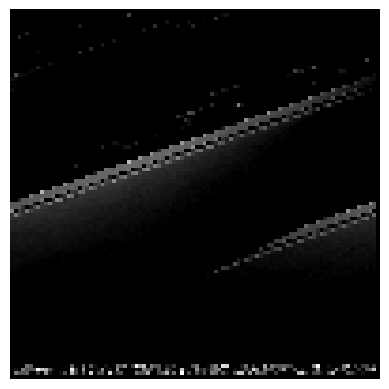

In [10]:
for vals in [dec_img,]:
    image = get_image(vals)
    plt.imshow(image, cmap='gray', vmin=0, vmax=np.max(image))
    plt.axis('off')
    plt.show()

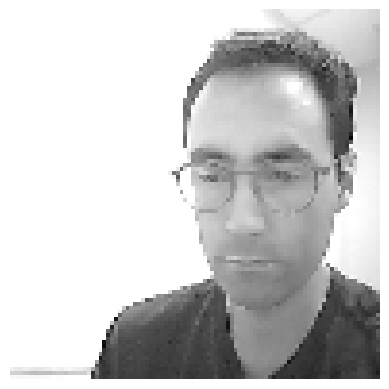

In [45]:

try:
    hex_string = input("Enter the image hex (max size 96x96):")
    hex_string_values = hex_string.split(",")[:96*96]
    hex_values = list(map(lambda hex_string: int(hex_string.strip(), 16), hex_string_values))
    image = get_image(hex_values)
    plt.imshow(image, cmap='gray', vmin=0, vmax=np.max(image))
    plt.axis('off')
    plt.show()
except Exception as e:
    image = None
    print(e)

In [28]:
if image is not None:
    user_images = len([img for img in os.listdir(images_path) if img.startswith("user")])
    output_file_path = os.path.join(images_path, f"user{user_images}")
    image_uint8 = image.astype(np.uint8)
    flattened_image_data = image_uint8.flatten()
    print(flattened_image_data.size)
    image_bytes = flattened_image_data.tobytes()

    with open(output_file_path, 'wb') as file:
        file.write(image_bytes)

9216
